[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/RikVoorhaar/optimization-II-2021/blob/master/notebooks/week1.ipynb)

# Week 1

## Exercise 1
<div class="alert alert-info">
Exercise

For $n\in\mathbb{N}$, let a matrix $P \in \mathbb{R}^{n \times n}$ be symmetric and positive definite.
</div>

### a)
<div class="alert alert-info">
Exercise

Show that the function $\|\cdot\|_{P}: \;\mathbb{R}^{n} \rightarrow \mathbb{R}$ given by

$$
    \|x\|_{P} = \sqrt{x^{\top} P \, x \,}
    \quad\text{for all}\quad
    x\in\mathbb{R}^{n}
$$
   
is _well-defined_ on $\mathbb{R}^{n}$ and is a _norm_ on $\mathbb{R}^{n}$.
</div>

Since $P$ is positive definite, $x^\top P x\geq 0$ for all $x\in\mathbb R^n$, so $\|x\|_P$ is well-defined. More generally, let us show that $\langle\cdot,\cdot\rangle_{P}$ is an inner product on $\mathbb{R}^{n}$. We have:

- _Symmetry_. For all $x,y\in\mathbb{R}^n$, we have $\langle x,y\rangle_{P} = x^{\top} P \, y  = x^{\top} P^{\top} y = (x^{\top} P^{\top} y)^{\top} = y^{\top} P \, x = \langle y,x\rangle_{P}$ due to the symmetry of $P$.  
- _Positivity_. For every $x\in\mathbb{R}^n$, we have $\langle x,x\rangle_{P} \geq 0$ due to the positive-(semi)definiteness of $P$.  
- _Bilinearity_. For all $x,y,z\in\mathbb{R}^n$ and $\alpha\in\mathbb{R}$, we have $\langle \alpha x + y,z \rangle_{P} = (\alpha x + y)^{\top} P \, z = \alpha x^{\top} P \, z + y^{\top} P \, z = \alpha \langle x,z \rangle_{P} + \langle y,z \rangle_{P}$ due to the linearity of the matrix product.  
- _Positive definiteness_. For every $x\in\mathbb{R}^n$ such that $\langle x,x\rangle_{P} = 0$, we have $x=0$ due to the positive-definiteness of $P$.

In particular we conclude that $\|\cdot\|_{P}$ is a norm on $\mathbb{R}^n$.

### b)
<div class="alert alert-info">
**Exercise** 
    
For $c\in\mathbb{R}^{n}$, show that

$$
 \mathcal{E}
 =
 \big\{ x\in\mathbb{R}^{n}: \; \|x-c\|_{P} \leq 1 \big\}
$$
    
   is a convex set.
</div>

For all $x,y\in\mathcal{E}$ and $t\in(0,1)$, we have 

$$
\begin{align}
\|((1-t)x + ty)-c\|_{P}&=\|(1-t)(x-c) + t(y-c)\|_{P}\\
&\leq (1-t) \|x-c\|_{P} + t \|y-c\|_{P}\\
&\leq (1-t) + t = 1
\end{align}
$$

by the triangle inequality and definition of $\mathcal{E}$, so that $(1-t)x + ty\in\mathcal{E}$. The set $\mathcal{E}$ is therefore convex.

### c)
<div class="alert alert-info">
**Exercise** 
    
Show that $\mathcal{E}$ is an ellipsoid in $\mathbb{R}^n$ and determine its center and axes. Recall that an ellipsoid is defined as the image of a unit ball in $\mathbb R^n$ under an affine transformation.

Hint: Use the decomposition $P=(P^{1/2})^TP^{1/2}$.
</div>

We have

$$
\begin{align}
\mathcal{E}&=\left\{ x\in\mathbb{R}^{n}\mid \|x-c\|_{P} \leq 1 \right\}\\
&=\left\{ x+c\in\mathbb{R}^{n}\mid \|x\|_{P} \leq 1 \right\}\\
&=\left\{ x+c\in\mathbb{R}^{n}\mid \sqrt{x^TPx} \leq 1 \right\}\\
&=\left\{ x+c\in\mathbb{R}^{n}\mid \sqrt{(P^{1/2}x)^TP^{1/2}x} \leq 1 \right\}\\
&=\left\{ x+c\in\mathbb{R}^{n}\mid \|P^{1/2}x\| \leq 1 \right\}\\
&=\left\{ P^{-1/2}(x)+c\in\mathbb{R}^{n}\mid \|x\| \leq 1 \right\}
\end{align}
$$

That is, $\mathcal E$ is the image under the affine transformation 
$$
x\mapsto P^{-1/2}(x)+c
$$

where we note that $P^{-1/2}$ exists because $P$ is positive definite. 

The axes of this ellipsoid are the eigenvectors of $P$.

### d)
<div class="alert alert-info">
**Exercise** 
    
Draw a sketch of all the possible shapes of the general set ${\cal E}$ in $\mathbb{R}^2$ defined in (b) when the symmetric matrix $P$ is positive definite and positive semidefinite. What happens when $P$ is symmetric but only positive semidefinite? Is $\mathcal{E}$ still a convex set? 

</div>

We can plot the different regions possible using Python. Making these kind of plots can be a bit tricky, so don't worry if you don't fully understand this.

We can form a $1000\times 1000$ grid of values $x,y$. (this size is arbitrary) using `np.meshgrid`. These are stacked together to form a $2\times 1000\times 1000$ tensor `X`. Then to efficiently compute $\|X\|_P=\sqrt{X^\top P X}$ for each value in the $1000\times 1000$ grid we define the array `Y` by
$$
    Y_{ab} = \sqrt{\sum_{i,j} X_{iab} P_{ij} X_{jab}}
$$

These kinds of sums can be computed by using `np.einsum` (the name refers to Einstein summation notation). Here we supply as first argument the string `'iab,ij,jab->ab'`. The part left of the `->` tells numpy the names of all the indices. Like in the equation above, we give the first $X$ the indices `iab`, then $P$ the indices `ij`, and the second $X$ the indices `jab`. We finally tell numpy that the output should only have the indices `ab`, and numpy will sum over the indices `i` and `j` because they are ommitted on the right hand side. This produces the sum of the equation above. This function `np.einsum` is extremely useful when working with tensors, but it does take some getting used to. For more information on how to use `np.einsum`, see [this stackoverflow discussion](https://stackoverflow.com/questions/26089893/understanding-numpys-einsum). Note that we could also do the same with a for loop looping over all the positions in the grid, but this would be slower.

Then finally we form a boolean array `region` where the elements are `True` if $Y\leq 1$ and false otherwise. We can then plot this boolean array using `plt.imshow`.

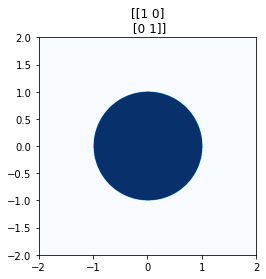

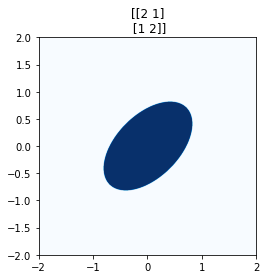

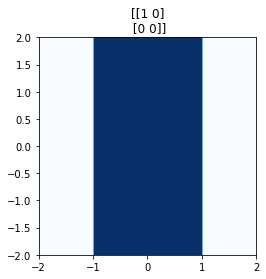

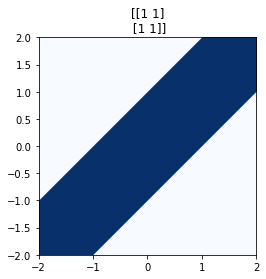

<Figure size 432x288 with 0 Axes>

In [7]:
import matplotlib.pyplot as plt
import numpy as np


def draw_ellipse(P):
    # Make a big grid of x and y values
    d = np.linspace(-2, 2, 1000)
    X = np.stack(np.meshgrid(d, d))

    # define the region as those values where sqrt((x,y)^T P(x,y)) < 1
    # equivalently abs((x,y)^T P(x,y)) < 1
    Y = np.abs(np.einsum("iab,ij,jab->ab", X, P, X))
    region = Y <= 1

    # region is a boolean matrix. we can plot it with plt.imshow
    plt.imshow(region, cmap="Blues", extent=[-2, 2, -2, 2])
    plt.title(P)
    plt.figure();


# Positive definite, always an ellipsoid
P = np.array([[1, 0], [0, 1]])
draw_ellipse(P)

# Positive definite, always an ellipsoid
P = np.array([[2, 1], [1, 2]])
draw_ellipse(P)

# Positive semidefinite, still convex, but not an ellipsoid.
# Here it is equivalent to the region {(x,y) | |x| < 1}
P = np.array([[1, 0], [0, 0]])
draw_ellipse(P)

# Positive semidefinite, still convex, but not an ellipsoid.
# Here it is equivalent to the region {(x,y) | |x+y| < 1}
P = np.array([[1, 1], [1, 1]])
draw_ellipse(P)

## Exercise 2
<div class="alert alert-info">
**Exercise** 

Assume that $f:\mathbb{R}^n\rightarrow \mathbb{R}$ is continuously differentiable. Recall that for every $x,y\in\mathbb{R}^n$ the following Taylor expansion holds

$$
	f(x+y)=f(x)+\nabla f(x+ty)^Ty
$$

for a certain $t\in(0,1)$.
    
Prove that, if $x^*$ is a local minimizer of $f$, then $\nabla f (x^*)=0$.
    
</div>

Suppose by contradiction that $\nabla f(x^*)\neq 0$, and define $y=-\nabla f(x^*)$. Then 
$$
\nabla f(x^*)^Ty = -\|\nabla f(x^*)\|^2 <0
$$

By continuity of $\nabla f$ there is a $T>0$ such that 
$$
\nabla f(x^*+ty)^Ty <0,\qquad \forall t\in [0,T]
$$

Now, for any $t\in [0,T]$ there exists by Taylor's theorem a $0<t'<t<T$ such that
$$
f(x^*+ty) = f(x^*) + \nabla f(x^*+t'y)^Tty
$$

Since $t'<T$ we have then that $\nabla f(x^*+t'y)^Ty<0$, so that $f(x^*+ty) < f(x^*)$ for all $t\in [0,T]$. Hence $f$ always decreases in the direction of $y$, and $x^*$ is not a local minimizer.

Alternatively, we using the fact that $x^*$ is a local minimizer, we have for all $d\in \mathbb R^n$ that $f(x^*+\epsilon d)\geq f(x^*)$ for $\epsilon>0$ small enough. Hence
$$
0\leq \lim_{\epsilon \to 0}\frac{f(x^*+\epsilon d)-f(x^*)}{\epsilon}  = \nabla f(x^*)^\top d
$$

This shows that both $\nabla f(x^*)^\top d\geq 0$ and $\nabla f(x^*)^\top (-d)\geq 0$, hence $\nabla f(x^*)^\top d= 0$ for all $d$, and $\nabla f(x^*)=0$.

## Exercise 3
<div class="alert alert-info">
**Exercise** 
    
Let $X\subset \mathbb{R}^n$, $X\neq \emptyset$ be  a closed subset.

</div>

### a)
<div class="alert alert-info">
**Exercise** 

Prove that for every $z\in \mathbb{R}^n$ there exists a point $x\in X$ that minimizes the function

$$
		g\colon X\to \mathbb R,\qquad g(x)=\left\|z-x\right\|
$$

Hint: First show this is true if $X$ is bounded. Then use coercitivity to restrict $g$ to a bounded subset which contains the minimum if it exists. 
    
</div>

If $X$ is bounded, then by Weierstrass theorem $g$ attains its minimum. If $X$ is not bounded, then we have by continuity that $S_a = g^{-1}((-\infty,a])$ is closed.

By coercitivity of $g$ it is also bounded: suppose it is not bounded, then there is a sequence $\{x_i\}\subset S_a$ with $\lim_{i\to\infty}\|x_i\| = \infty$. But then by coercitivity $\lim_{i\to\infty}g(x_i)=\infty$ as well. However $g$ is bounded by $a$ on $S_a$, and we arrive at a contradiction, showing $S_a$ must be bounded.

Now choose any $a>\inf_{x\in X}g(x)$, then $g|_{S_a}$ is a continuous function on a closed and bounded subset, hence it attains its minimum at some point $x^*$. Then finally we note that $x^*$ is also a minimizer for $g$ on $X$.

Note that the minimizer $x^*$ is the best approximation of the point $z$ in the set $X$. 

### b)
<div class="alert alert-info">
**Exercise** 

Suppose now that $X$ is also convex. Show that $g$ is a convex function.
    
</div>

We need to show that $g(tx+(1-t)y)\leq tg(x)+(1-t)g(y)$ for all $0\leq t\leq 1$ and $x,y\in X$. This follows from the triangle inequality and linearity of the norm:

$$
\begin{align}
g(tx+(1-t)y)&=\|z-tx-(t-t)y\|=\|t(z-x)+(1-t)(z-y)\|\\
&\leq \|t(z-x)\|+\|(1-t)(z-y)\|\\
& = t\|z-x\|+(1-t)\|z-y\|\\
& = tg(x)+(1-t)g(y)
\end{align}
$$

## Exercise 4
<div class="alert alert-info">
**Exercise** 

Consider the function 

$$
	f(x,y)=\sin(x)+\cosh(y).
$$
    
</div>

### a)
<div class="alert alert-info">
**Exercise** 
    
Find the critical points of $f$;

</div>

First of all we have
$$
    \nabla f(x,y) = (\cos(x), \sinh(y))^\top
$$

This is zero if $x = \pi/2\mod \pi$. The only real zero of $\sinh(y)$ is $y=0$. Hence the critical points are enumerated by $(\pi/2+k\pi,0)$, $k\in \mathbb Z$. 

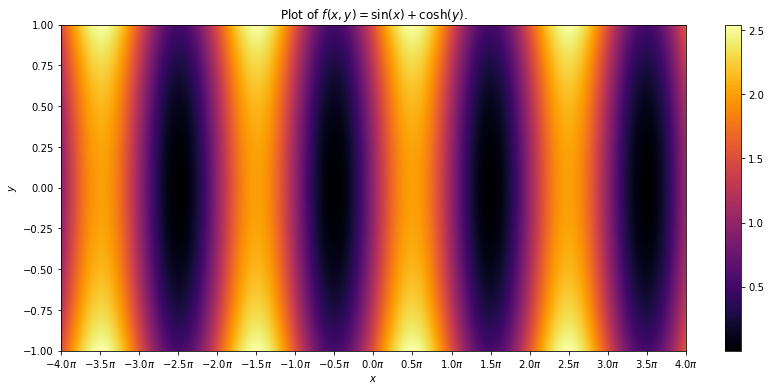

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Create a (300,300) matrix of values of $f$ at different points
xmin, xmax = (-4 * np.pi, 4 * np.pi)
ymin, ymax = (-1, 1)
n_points = 300
x, y = np.meshgrid(np.linspace(xmin, xmax, n_points), np.linspace(ymin, ymax, n_points))
f = np.sin(x) + np.cosh(y)

# Plot the result using plt.imshow
plt.figure(figsize=(14, 6))
plt.title("Plot of $f(x,y)=\sin(x)+\cosh(y)$.")
plt.imshow(f, extent=[xmin, xmax, ymin, ymax], aspect="auto", cmap="inferno")
plt.xticks(
    ticks=np.arange(xmin, xmax + 0.001, np.pi / 2),
    labels=[
        f"${x:.1f}\pi$" for x in np.arange(xmin / np.pi, xmax / np.pi + 0.001, 0.5)
    ],
)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.colorbar();

### b)
<div class="alert alert-info">
**Exercise** 
    
Write the Hessian of $f$;   

</div>

The Hessian is given by

$$
H_f(x,y) = \begin{pmatrix}
-\sin(x) & 0\\ 
0 & \cosh(y)
\end{pmatrix}
$$

### c)
<div class="alert alert-info">
**Exercise** 

Find the critical points for which the Hessian is positive definite.
    
</div>

If we evaluate the Hessian at the critial points, we get

$$
H_f(\frac \pi 2+k\pi,0) = \begin{pmatrix}(-1)^{k+1}&0\\0&1\end{pmatrix}
$$

This is positive definite for $k$ odd, and the critical points where the Hessian is PD are enumerated by $(3\pi/2+2k\pi,0)$, $k\in\mathbb Z$.

We can see this in the plot. The critical points corresponding to the black regions are minima, but the critical points in the orange region are saddle points. There, going in the $y$ direction increases the function, but the function decreases in $x$ direction.